In [19]:
import pandas as pd
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy.stats import norm
import plotly.express as px
import csv


In [20]:
# Load the combined data
combined_data = pd.read_csv('combined_monthly_data.csv')

In [21]:

# Calculate averages, minimum, and maximum values for each metric per user
stats_by_person = combined_data.groupby('user_name').agg(
    average_hours_picking=('Avg Hours Picking', 'mean'),
    min_hours_picking=('Avg Hours Picking', 'min'),
    max_hours_picking=('Avg Hours Picking', 'max'),
    average_lines_per_hour=('Avg Lines/Hr', 'mean'),
    min_lines_per_hour=('Avg Lines/Hr', 'min'),
    max_lines_per_hour=('Avg Lines/Hr', 'max'),
    items_per_hour=('Avg Items/Hr', 'mean'),
    min_items_per_hour=('Avg Items/Hr', 'min'),
    max_items_per_hour=('Avg Items/Hr', 'max')
).reset_index()




In [24]:

# Renaming columns
stats_by_person = stats_by_person.rename(columns={
    'user_name': 'Picker',
    'average_hours_picking': 'Average Hours Picking',
    'min_hours_picking': 'Min Hours Picking',
    'max_hours_picking': 'Max Hours Picking',
    'average_lines_per_hour': 'Average Lines per Hour',
    'min_lines_per_hour': 'Min Lines per Hour',
    'max_lines_per_hour': 'Max Lines per Hour',
    'items_per_hour': ' Avg Items per Hour',
    'min_items_per_hour': 'Min Items per Hour',
    'max_items_per_hour': 'Max Items per Hour'
})

In [22]:
# Save the stats to a new CSV file

stats_by_person.to_csv('stats_by_person_min_max.csv', index=False)


In [26]:
# Assuming you have the 'stats_by_person' DataFrame with the statistics

# List of names to exclude
names_to_exclude = ['richie', 'jackr', 'jessek','simonb']  # Replace 'Name1', 'Name2' with the names you want to exclude

# Filtering out names to exclude
filtered_stats = stats_by_person[~stats_by_person['Picker'].isin(names_to_exclude)]

# Finding the user with the highest average for each column
highest_average_hours_picking = filtered_stats.loc[filtered_stats['Average Hours Picking'].idxmax()]
highest_average_lines_per_hour = filtered_stats.loc[filtered_stats['Average Lines per Hour'].idxmax()]
highest_items_per_hour = filtered_stats.loc[filtered_stats['Items per Hour'].idxmax()]

print("User(s) with the highest averages:")
print("Highest Average Hours Picking:", highest_average_hours_picking['Picker'])
print("Highest Average Lines per Hour:", highest_average_lines_per_hour['Picker'])
print("Highest Items per Hour:", highest_items_per_hour['Picker'])


KeyError: 'Items per Hour'

In [ ]:
# Assuming you have the 'stats_by_person' DataFrame with the statistics

# Ranking everyone against each other for each column
stats_by_person['Rank_Avg_Hours_Picking'] = stats_by_person['Average Hours Picking'].rank()
stats_by_person['Rank_Avg_Lines_Per_Hour'] = stats_by_person['Average Lines per Hour'].rank()
stats_by_person['Rank_Items_Per_Hour'] = stats_by_person['Items per Hour'].rank()

# Inverting the rankings
max_rank = stats_by_person.shape[0]  # Total number of rows/users
stats_by_person['Rank_Avg_Hours_Picking'] = max_rank + 1 - stats_by_person['Rank_Avg_Hours_Picking']
stats_by_person['Rank_Avg_Lines_Per_Hour'] = max_rank + 1 - stats_by_person['Rank_Avg_Lines_Per_Hour']
stats_by_person['Rank_Items_Per_Hour'] = max_rank + 1 - stats_by_person['Rank_Items_Per_Hour']

# Save the inverted ranked data to a new CSV file
stats_by_person.to_csv('ranked_stats_by_person_all.csv', index=False)


In [ ]:
# Assuming you have the 'stats_by_person' DataFrame with the inverted rankings

# List of names to exclude
names_to_exclude = ['simonb', 'richie', 'jessek', 'jackr']  # Replace 'Name1', 'Name2' with the names you want to exclude

# Filtering out names to exclude and displaying rankings with actual numbers for each column separately in ascending order
filtered_hours_picking = stats_by_person[~stats_by_person['Picker'].isin(names_to_exclude)].sort_values(by='Rank_Avg_Hours_Picking')
print("Rankings for Average Hours Picking:")
print(filtered_hours_picking[['Picker', 'Rank_Avg_Hours_Picking', 'Average Hours Picking']])

filtered_lines_per_hour = stats_by_person[~stats_by_person['Picker'].isin(names_to_exclude)].sort_values(by='Rank_Avg_Lines_Per_Hour')
print("\nRankings for Average Lines per Hour:")
print(filtered_lines_per_hour[['Picker', 'Rank_Avg_Lines_Per_Hour', 'Average Lines per Hour']])

filtered_items_per_hour = stats_by_person[~stats_by_person['Picker'].isin(names_to_exclude)].sort_values(by='Rank_Items_Per_Hour')
print("\nRankings for Items per Hour:")
print(filtered_items_per_hour[['Picker', 'Rank_Items_Per_Hour', 'Items per Hour']])


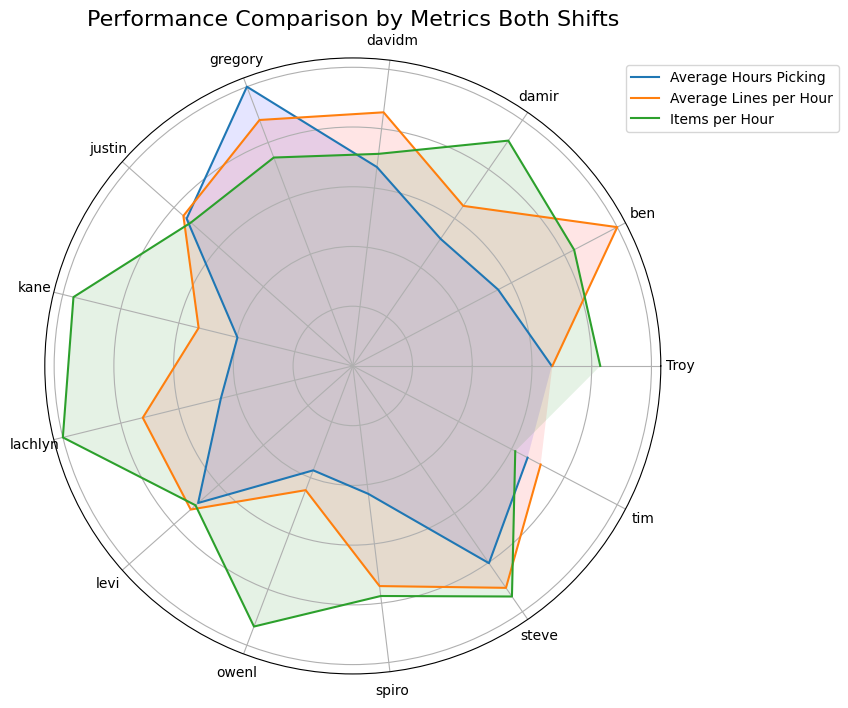

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load data from the CSV file
data = pd.read_csv('ranked_stats_by_person_all.csv')

# List of names to exclude
names_to_exclude = ['simonb', 'jessek', 'jackr', 'richie']  # Replace with the names you want to exclude

# Filter data to exclude specific names
filtered_data = data[~data['Picker'].isin(names_to_exclude)]

# Extract necessary columns
pickers = filtered_data['Picker'].tolist()
avg_hours_picking = filtered_data['Average Hours Picking'].tolist()
avg_lines_per_hour = filtered_data['Average Lines per Hour'].tolist()
items_per_hour = filtered_data['Items per Hour'].tolist()

# Normalize the values to display on the radar plot
max_values = [max(avg_hours_picking), max(avg_lines_per_hour), max(items_per_hour)]
normalized_avg_hours_picking = np.array(avg_hours_picking) / max_values[0]
normalized_avg_lines_per_hour = np.array(avg_lines_per_hour) / max_values[1]
normalized_items_per_hour = np.array(items_per_hour) / max_values[2]

# Define the angles for the radar plot
labels = ['Average Hours Picking', 'Average Lines per Hour', 'Items per Hour']
angles = np.linspace(0, 2 * np.pi, len(pickers), endpoint=False).tolist()

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot each picker's performance on the radar plot
ax.plot(angles, normalized_avg_hours_picking, label='Average Hours Picking')
ax.fill(angles, normalized_avg_hours_picking, 'b', alpha=0.1)

ax.plot(angles, normalized_avg_lines_per_hour, label='Average Lines per Hour')
ax.fill(angles, normalized_avg_lines_per_hour, 'r', alpha=0.1)

ax.plot(angles, normalized_items_per_hour, label='Items per Hour')
ax.fill(angles, normalized_items_per_hour, 'g', alpha=0.1)

# Define your title
title_text = "Performance Comparison by Metrics Both Shifts"

# Set the title for the plot
plt.title(title_text, fontsize=16)  # Adjust fontsize as needed
# Display the labels for each picker
ax.set_yticklabels([])
ax.set_xticks(angles)
ax.set_xticklabels(pickers)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1))  # Adjust the values (x, y) for positioning

plt.show()


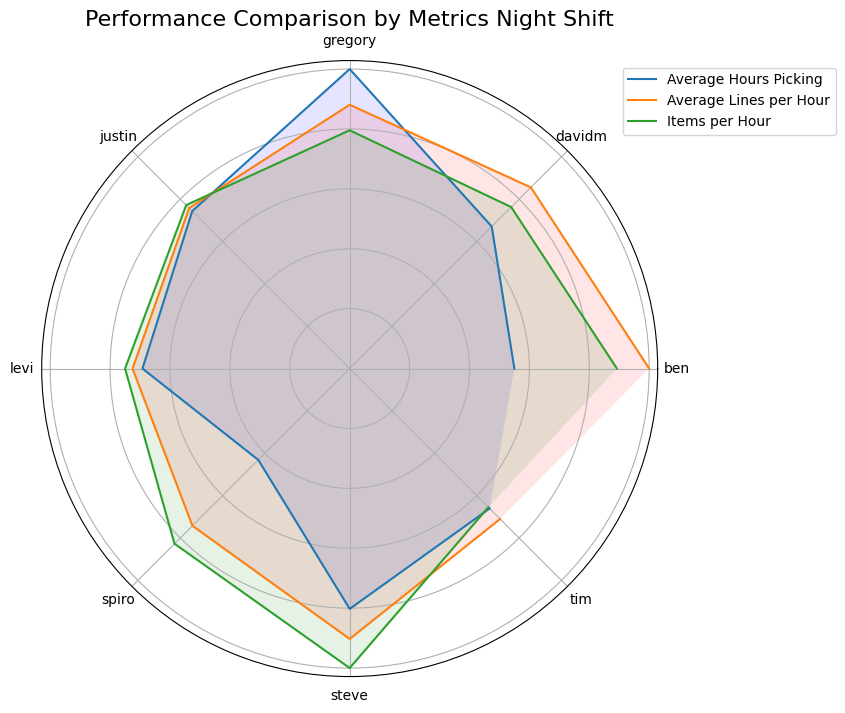

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load data from the CSV file
data = pd.read_csv('ranked_stats_by_person_all.csv')

# List of names to exclude
names_to_exclude = ['simonb', 'jessek', 'jackr', 'richie','damir', 'lachlyn','owenl','Troy','kane']  # Replace with the names you want to exclude

# Filter data to exclude specific names
filtered_data = data[~data['Picker'].isin(names_to_exclude)]

# Extract necessary columns
pickers = filtered_data['Picker'].tolist()
avg_hours_picking = filtered_data['Average Hours Picking'].tolist()
avg_lines_per_hour = filtered_data['Average Lines per Hour'].tolist()
items_per_hour = filtered_data['Items per Hour'].tolist()

# Normalize the values to display on the radar plot
max_values = [max(avg_hours_picking), max(avg_lines_per_hour), max(items_per_hour)]
normalized_avg_hours_picking = np.array(avg_hours_picking) / max_values[0]
normalized_avg_lines_per_hour = np.array(avg_lines_per_hour) / max_values[1]
normalized_items_per_hour = np.array(items_per_hour) / max_values[2]

# Define the angles for the radar plot
labels = ['Average Hours Picking', 'Average Lines per Hour', 'Items per Hour']
angles = np.linspace(0, 2 * np.pi, len(pickers), endpoint=False).tolist()

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot each picker's performance on the radar plot
ax.plot(angles, normalized_avg_hours_picking, label='Average Hours Picking')
ax.fill(angles, normalized_avg_hours_picking, 'b', alpha=0.1)

ax.plot(angles, normalized_avg_lines_per_hour, label='Average Lines per Hour')
ax.fill(angles, normalized_avg_lines_per_hour, 'r', alpha=0.1)

ax.plot(angles, normalized_items_per_hour, label='Items per Hour')
ax.fill(angles, normalized_items_per_hour, 'g', alpha=0.1)

# Define your title
title_text = "Performance Comparison by Metrics Night Shift"

# Set the title for the plot
plt.title(title_text, fontsize=16)  # Adjust fontsize as needed
# Display the labels for each picker
ax.set_yticklabels([])
ax.set_xticks(angles)
ax.set_xticklabels(pickers)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1))  # Adjust the values (x, y) for positioning

plt.show()


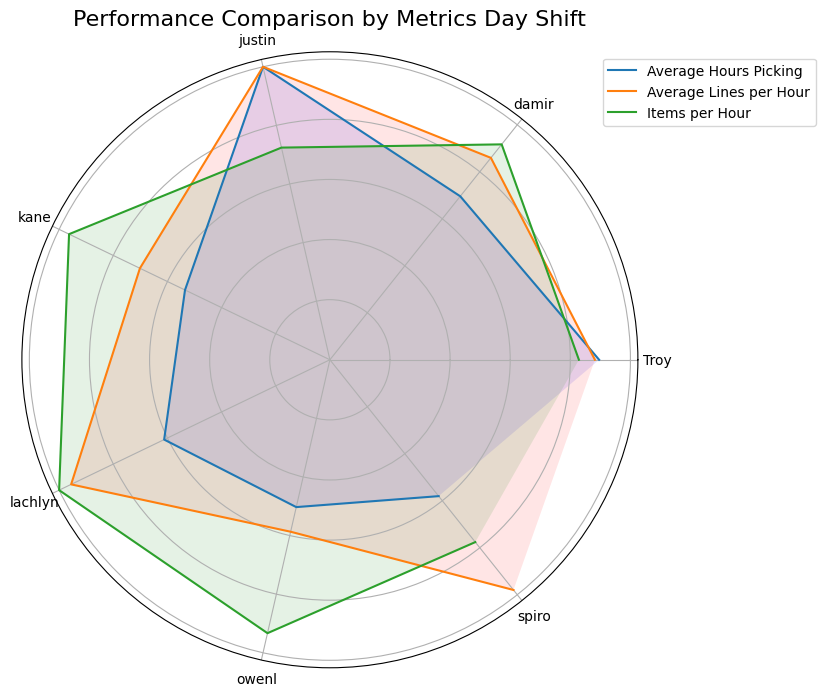

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load data from the CSV file
data = pd.read_csv('ranked_stats_by_person_all.csv')

# List of names to exclude
names_to_exclude = ['simonb', 'jessek', 'jackr', 'richie','ben', 'davidm', 'gregory', 'steve','tim','levi']  # Replace with the names you want to exclude

# Filter data to exclude specific names
filtered_data = data[~data['Picker'].isin(names_to_exclude)]

# Extract necessary columns
pickers = filtered_data['Picker'].tolist()
avg_hours_picking = filtered_data['Average Hours Picking'].tolist()
avg_lines_per_hour = filtered_data['Average Lines per Hour'].tolist()
items_per_hour = filtered_data['Items per Hour'].tolist()

# Normalize the values to display on the radar plot
max_values = [max(avg_hours_picking), max(avg_lines_per_hour), max(items_per_hour)]
normalized_avg_hours_picking = np.array(avg_hours_picking) / max_values[0]
normalized_avg_lines_per_hour = np.array(avg_lines_per_hour) / max_values[1]
normalized_items_per_hour = np.array(items_per_hour) / max_values[2]

# Define the angles for the radar plot
labels = ['Average Hours Picking', 'Average Lines per Hour', 'Items per Hour']
angles = np.linspace(0, 2 * np.pi, len(pickers), endpoint=False).tolist()

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot each picker's performance on the radar plot
ax.plot(angles, normalized_avg_hours_picking, label='Average Hours Picking')
ax.fill(angles, normalized_avg_hours_picking, 'b', alpha=0.1)

ax.plot(angles, normalized_avg_lines_per_hour, label='Average Lines per Hour')
ax.fill(angles, normalized_avg_lines_per_hour, 'r', alpha=0.1)

ax.plot(angles, normalized_items_per_hour, label='Items per Hour')
ax.fill(angles, normalized_items_per_hour, 'g', alpha=0.1)

# Define your title
title_text = "Performance Comparison by Metrics Day Shift"

# Set the title for the plot
plt.title(title_text, fontsize=16)  # Adjust fontsize as needed
# Display the labels for each picker
ax.set_yticklabels([])
ax.set_xticks(angles)
ax.set_xticklabels(pickers)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1))  # Adjust the values (x, y) for positioning

plt.show()


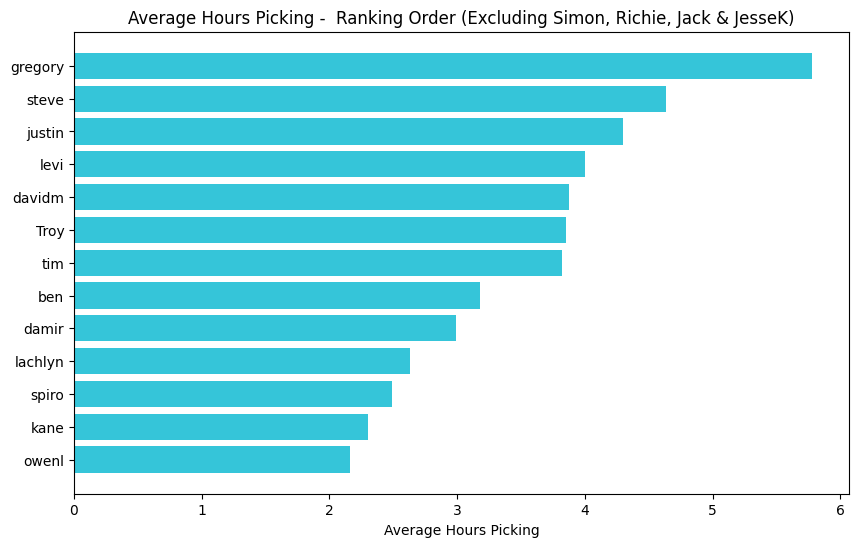

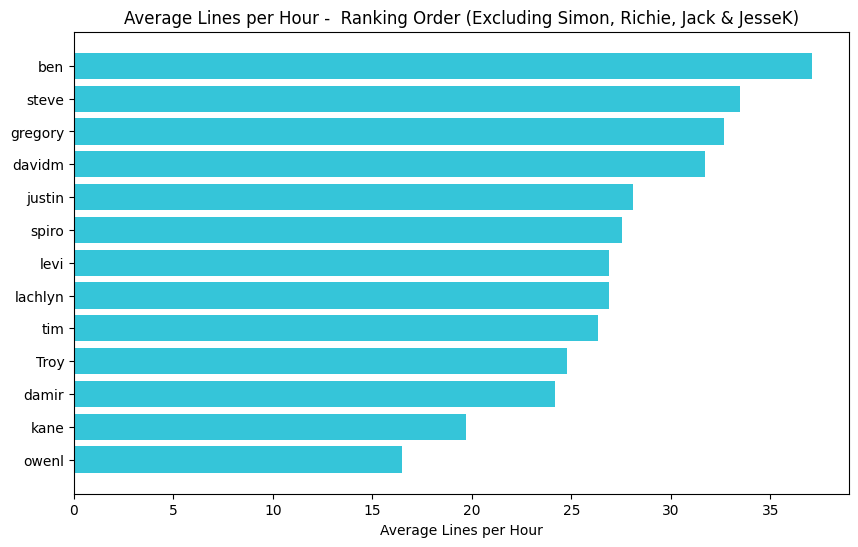

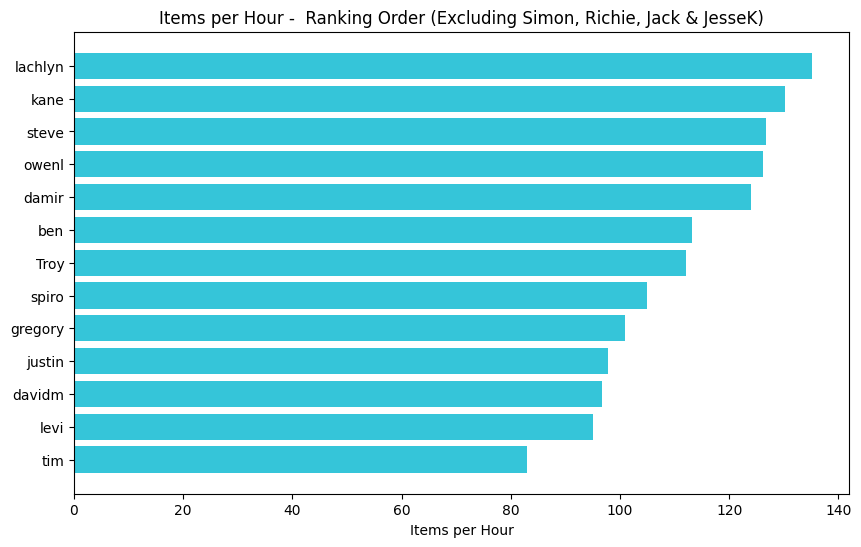

In [37]:

# List of names to exclude
names_to_exclude = ['simonb', 'jessek', 'jackr', 'richie']  # Replace with the names you want to exclude


# Filtered data excluding specified names
filtered_data = data[~data['Picker'].isin(names_to_exclude)]

# Define the metrics to create bar charts for
metrics = ['Average Hours Picking', 'Average Lines per Hour', 'Items per Hour']

# Plotting bar charts for each metric with inverted ranks
for metric in metrics:
    # Sort the filtered data by the metric in descending order for inverted ranks
    sorted_data = filtered_data.sort_values(by=metric, ascending=False)

    # Plotting the bar chart
    plt.figure(figsize=(10, 6))
    plt.barh(sorted_data['Picker'], sorted_data[metric], color='#35C5D9')
    
    # Adding labels and title
    plt.xlabel(metric)
    plt.title(f'{metric} -  Ranking Order (Excluding Simon, Richie, Jack & JesseK)')
    plt.gca().invert_yaxis()  # Invert y-axis for inverted ranking order

    plt.show()


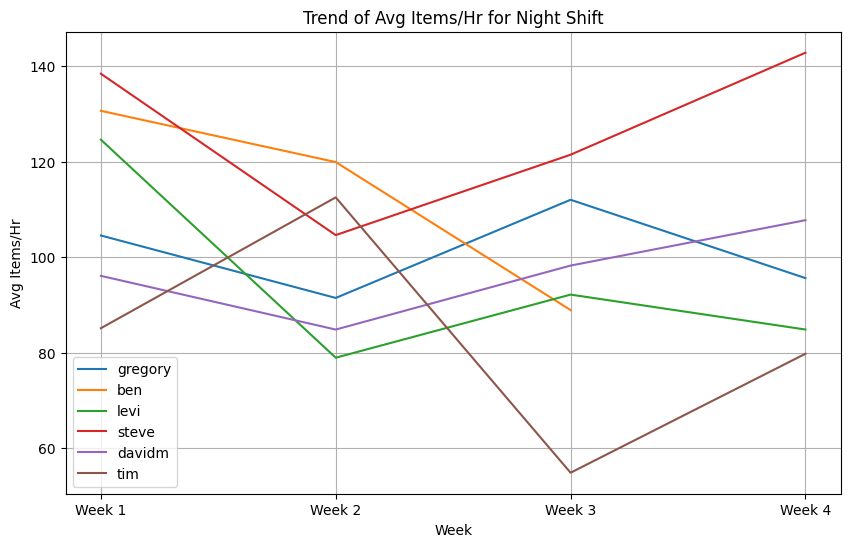

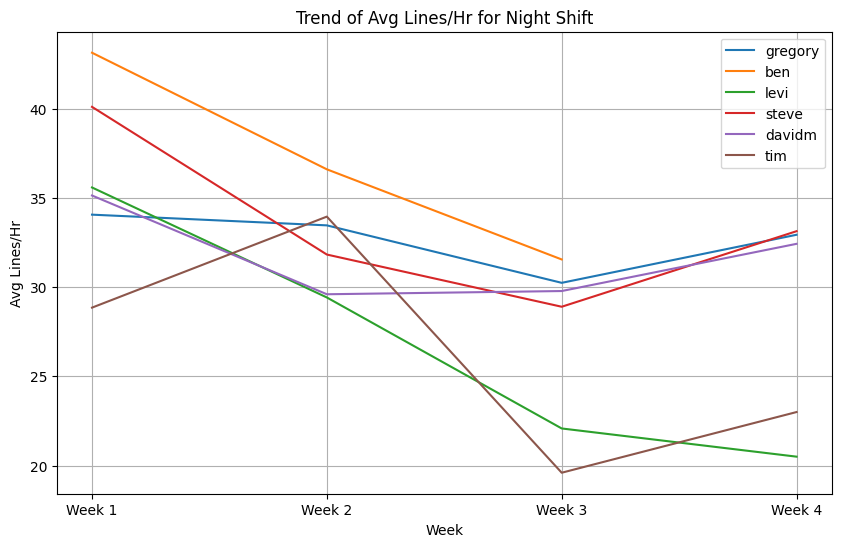

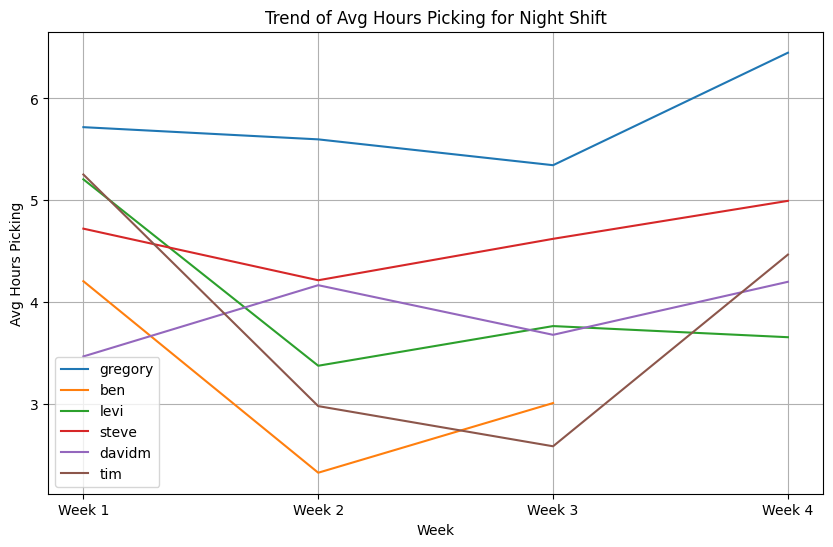

In [57]:

# Load the combined monthly data
data = pd.read_csv('combined_monthly_data.csv')

# List of users for analysis
users_of_interest = ['gregory', 'ben', 'levi','steve','davidm', 'tim']  # Add the users you want to plot

# Filter data for selected users
filtered_data = data[data['user_name'].isin(users_of_interest)]

# Melt the data to reshape it for visualization
melted_data = filtered_data.melt(id_vars='user_name', var_name='Metric', value_name='Value')

# List of metrics to plot
metrics_to_plot = ['Avg Items/Hr', 'Avg Lines/Hr', 'Avg Hours Picking']  # Add the metrics you want to visualize

# Plot line charts for each user and metric
for metric in metrics_to_plot:
    plt.figure(figsize=(10, 6))
    for user in users_of_interest:
        user_data = melted_data[(melted_data['user_name'] == user) & (melted_data['Metric'] == metric)]
        plt.plot(range(1, len(user_data) + 1), user_data['Value'], label=user)

    plt.xlabel('Week')
    plt.ylabel(metric)
    plt.title(f'Trend of {metric} for Night Shift')
    plt.legend()
    plt.xticks(range(1, len(user_data) + 1), labels=[f"Week {i}" for i in range(1, len(user_data) + 1)])  # Set x-axis ticks
    plt.grid(True)
    plt.show()


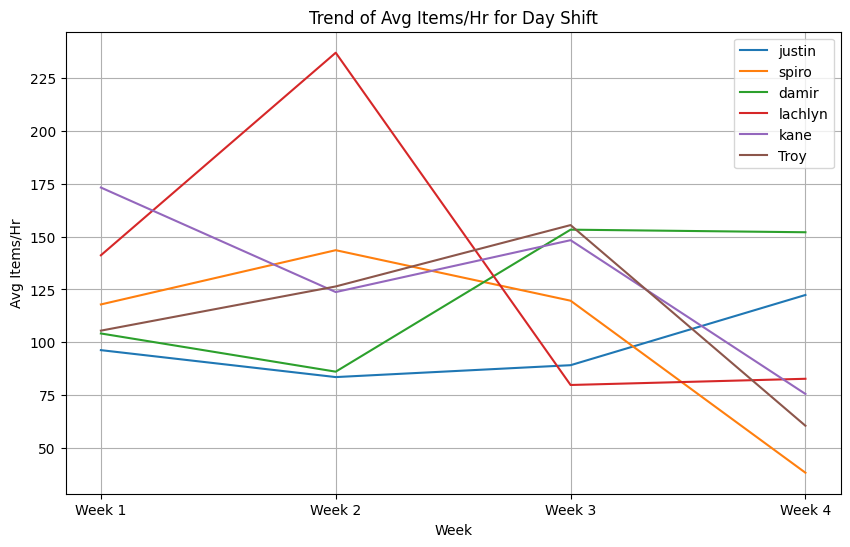

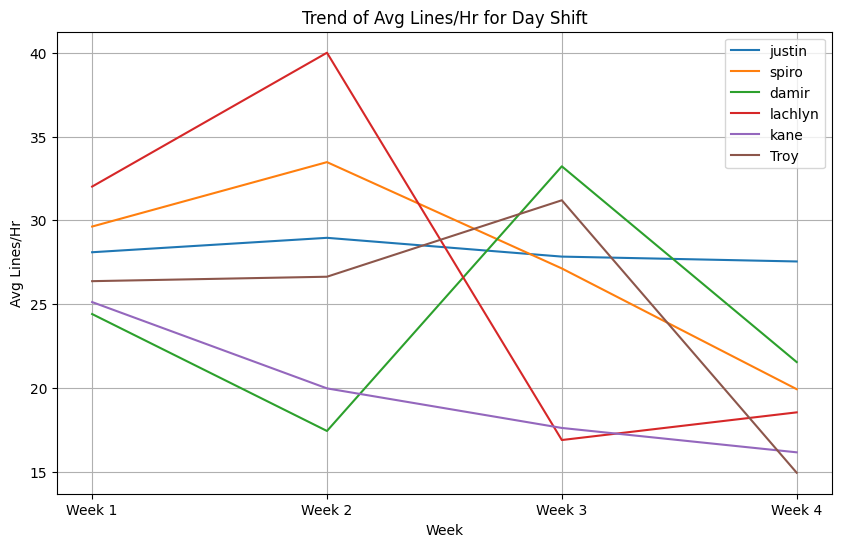

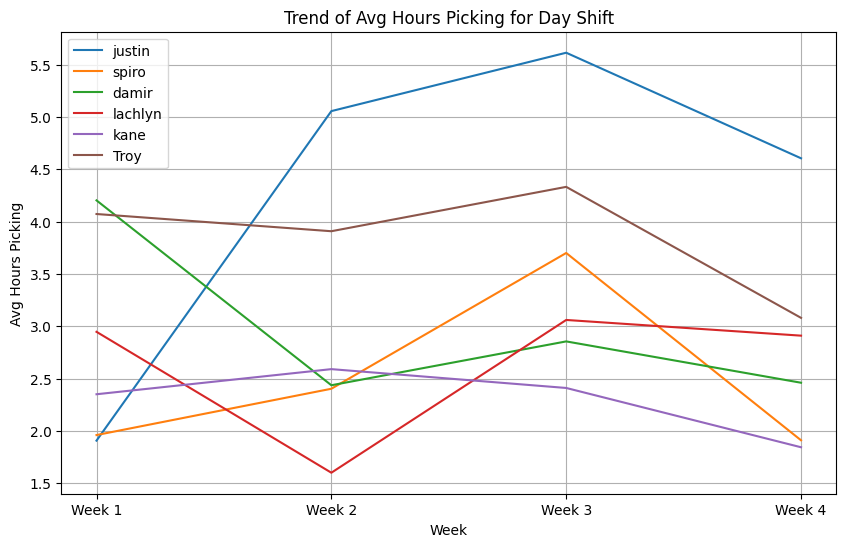

In [56]:

# Load the combined monthly data
data = pd.read_csv('combined_monthly_data.csv')

# List of users for analysis
users_of_interest = ['justin','spiro','damir','lachlyn','kane','Troy']  # Add the users you want to plot

# Filter data for selected users
filtered_data = data[data['user_name'].isin(users_of_interest)]

# Melt the data to reshape it for visualization
melted_data = filtered_data.melt(id_vars='user_name', var_name='Metric', value_name='Value')

# List of metrics to plot
metrics_to_plot = ['Avg Items/Hr', 'Avg Lines/Hr', 'Avg Hours Picking']  # Add the metrics you want to visualize

# Plot line charts for each user and metric
for metric in metrics_to_plot:
    plt.figure(figsize=(10, 6))
    for user in users_of_interest:
        user_data = melted_data[(melted_data['user_name'] == user) & (melted_data['Metric'] == metric)]
        plt.plot(range(1, len(user_data) + 1), user_data['Value'], label=user)

    plt.xlabel('Week')
    plt.ylabel(metric)
    plt.title(f'Trend of {metric} for Day Shift')
    plt.legend()
    plt.xticks(range(1, len(user_data) + 1), labels=[f"Week {i}" for i in range(1, len(user_data) + 1)])  # Set x-axis ticks
    plt.grid(True)
    plt.show()
